In [1]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
import nibabel as nib
from scipy.ndimage import affine_transform
import surfa as sf
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
#MIMS_HC_036
#MIMS_HC_037
#MIMS_HC_038
#MIMS_HC_040

In [3]:
path='/Users/teahserani/Desktop/Gyri_sulci/SG_Outputs/MIMS_HC_057_gy-sulc_Output/'
in_out_cortex='/Users/teahserani/Desktop/Gyri_sulci/SG_Outputs/MIMS_HC_057_gy-sulc_Output/Ctx_Inner_Outer'

In [4]:
#inner_cortex_volume=nib.load(f'{path}/ctx-lh-inner-reg-nearest.nii')
#inner_cortex = inner_cortex_volume.get_fdata()

lh_inner_cortex_volume=nib.load(f'{in_out_cortex}/ctx-lh-inner-reg-nearest.nii') 
lh_inner_cortex = lh_inner_cortex_volume.get_fdata()

lh_outer_cortex_volume=nib.load(f'{in_out_cortex}/ctx-lh-outer-reg-nearest.nii')
lh_outer_cortex = lh_outer_cortex_volume.get_fdata()


rh_inner_cortex_volume=nib.load(f'{in_out_cortex}/ctx-rh-inner-reg-nearest.nii')
rh_inner_cortex = rh_inner_cortex_volume.get_fdata()

rh_outer_cortex_volume=nib.load(f'{in_out_cortex}/ctx-rh-outer-reg-nearest.nii')
rh_outer_cortex = rh_outer_cortex_volume.get_fdata()

In [5]:
lh_gyri_volume=nib.load(f'{path}lh_gyri-reg-nearest.nii')
lh_gyri=lh_gyri_volume.get_fdata()
lh_sulci_volume=nib.load(f'{path}lh_sulci-reg-nearest.nii')
lh_sulci=lh_sulci_volume.get_fdata()

rh_gyri_volume=nib.load(f'{path}rh_gyri-reg-nearest.nii')
rh_gyri=lh_gyri_volume.get_fdata()
rh_sulci_volume=nib.load(f'{path}rh_sulci-reg-nearest.nii')
rh_sulci=lh_sulci_volume.get_fdata()

In [6]:
mu_volume=nib.load(f'{path}Mu.nii')
mu_with_csf=mu_volume.get_fdata()

csf_volume=nib.load(f'{path}register_nu_csf.nii')
csf=csf_volume.get_fdata()
csf_mask=(csf < .5).astype(int)
nu_volume=nib.load(f'{path}nu_reg.nii')
t1=nu_volume.get_fdata()

mu = mu_with_csf*csf_mask

In [9]:
#outer_cortex = np.concatenate([lh_outer_cortex, rh_outer_cortex],axis=0)
#inner_cortex = np.concatenate([lh_inner_cortex, rh_inner_cortex],axis=0)
lh_outer_cortex_mu = mu * lh_outer_cortex
lh_inner_cortex_mu = mu * lh_inner_cortex

rh_outer_cortex_mu = mu * rh_outer_cortex
rh_inner_cortex_mu = mu * rh_inner_cortex

outer_cortex_mu = np.concatenate([lh_outer_cortex_mu, rh_outer_cortex_mu],axis=0)
inner_cortex_mu = np.concatenate([lh_inner_cortex_mu, rh_inner_cortex_mu],axis=0)

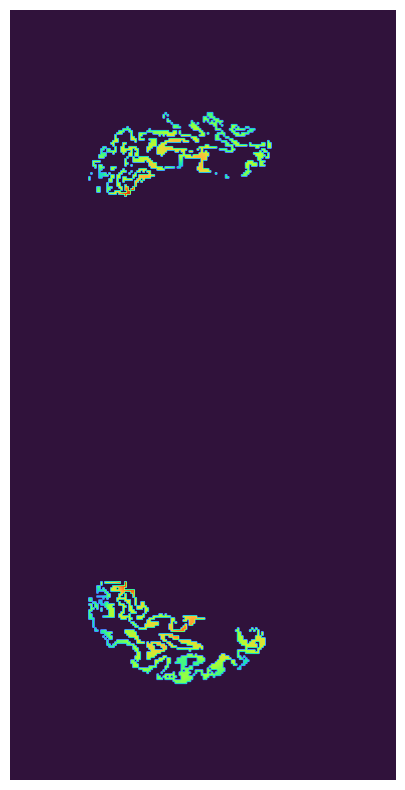

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(inner_cortex_mu[:,:,28],cmap='turbo',vmin = 0, vmax =5000)
plt.axis('off')
plt.show()

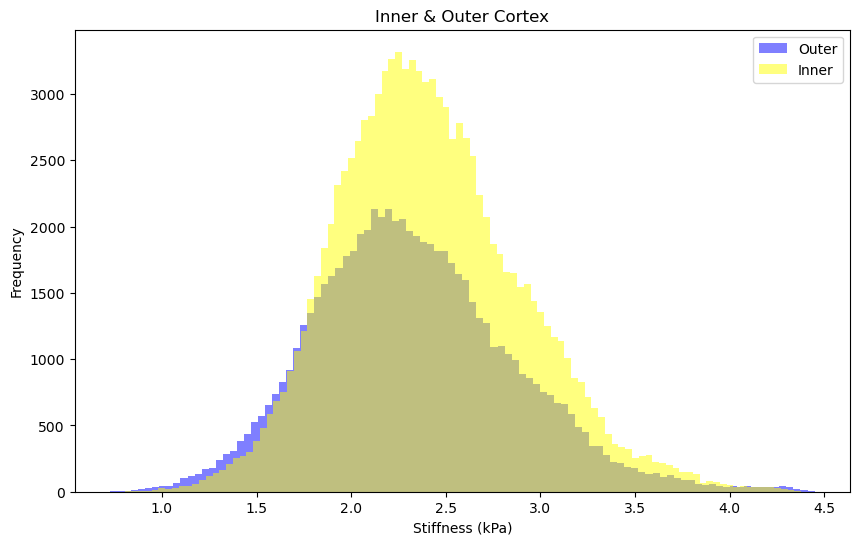

In [11]:
outer_cortex_mu_flat = outer_cortex_mu.flatten()
outer_cortex_mu_flat[outer_cortex_mu_flat == 0] = np.nan

inner_cortex_mu_flat = inner_cortex_mu.flatten()
inner_cortex_mu_flat[inner_cortex_mu_flat == 0] = np.nan

plt.figure(figsize=(10, 6))
plt.hist(outer_cortex_mu_flat / 1000, bins=100, alpha=0.5,label='Outer', color='blue')
plt.hist(inner_cortex_mu_flat / 1000, bins=100, alpha=0.5, label='Inner', color='yellow')
plt.xlabel('Stiffness (kPa)')
plt.ylabel('Frequency')
plt.title('Inner & Outer Cortex')
plt.legend(loc='best')
plt.show()


In [14]:
lh_outer_gyri_mu = lh_outer_cortex_mu*lh_gyri
lh_inner_gyri_mu = lh_inner_cortex_mu*lh_gyri

lh_outer_sulci_mu = lh_outer_cortex_mu*lh_sulci
lh_inner_sulci_mu = lh_inner_cortex_mu*lh_sulci

rh_outer_gyri_mu = rh_outer_cortex_mu*rh_gyri
rh_inner_gyri_mu = rh_inner_cortex_mu*rh_gyri

rh_outer_sulci_mu = rh_outer_cortex_mu*rh_sulci
rh_inner_sulci_mu = rh_inner_cortex_mu*rh_sulci

inner_gyri_mu = np.concatenate([lh_inner_gyri_mu, rh_inner_gyri_mu],axis=0)
outer_gyri_mu = np.concatenate([lh_outer_gyri_mu, rh_outer_gyri_mu],axis=0)

inner_sulci_mu = np.concatenate([lh_inner_sulci_mu, rh_inner_sulci_mu],axis=0)
outer_sulci_mu = np.concatenate([lh_outer_sulci_mu, rh_outer_sulci_mu],axis=0)

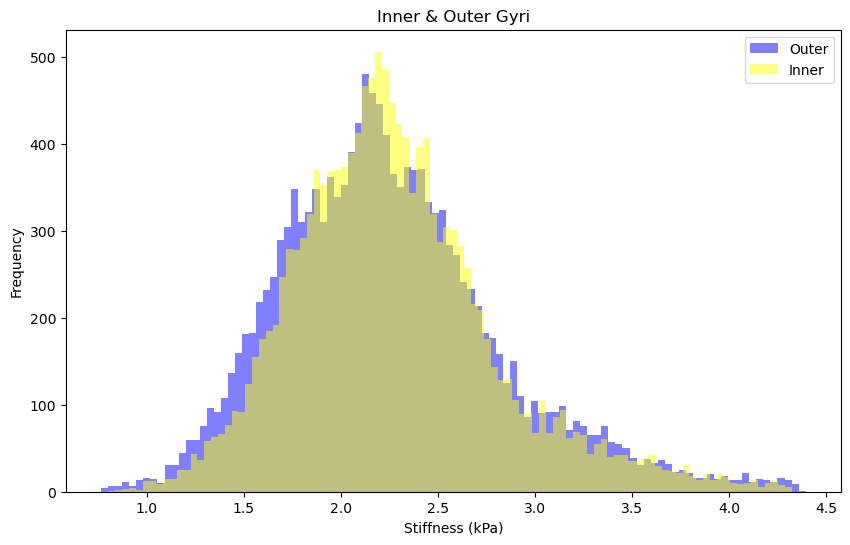

In [15]:
outer_gyri_mu_flat = outer_gyri_mu.flatten()
outer_gyri_mu_flat[outer_gyri_mu_flat == 0] = np.nan

inner_gyri_mu_flat = inner_gyri_mu.flatten()
inner_gyri_mu_flat[inner_gyri_mu_flat == 0] = np.nan

plt.figure(figsize=(10, 6))
plt.hist(outer_gyri_mu_flat / 1000, bins=100, alpha=0.5,label='Outer', color='blue')
plt.hist(inner_gyri_mu_flat / 1000, bins=100, alpha=0.5, label='Inner', color='yellow')
plt.xlabel('Stiffness (kPa)')
plt.ylabel('Frequency')
plt.title('Inner & Outer Gyri')
plt.legend(loc='best')
plt.show()


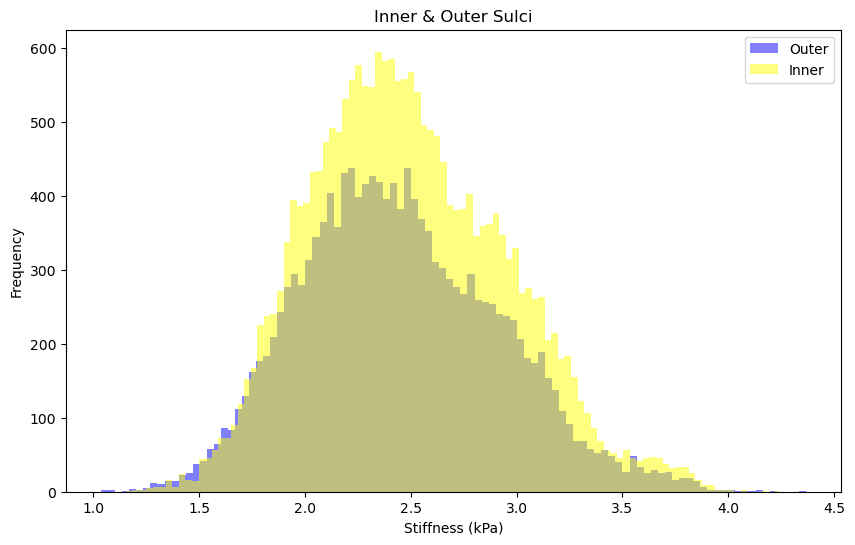

In [16]:
outer_sulci_mu_flat = outer_sulci_mu.flatten()
outer_sulci_mu_flat[outer_sulci_mu_flat == 0] = np.nan

inner_sulci_mu_flat = inner_sulci_mu.flatten()
inner_sulci_mu_flat[inner_sulci_mu_flat == 0] = np.nan

plt.figure(figsize=(10, 6))
plt.hist(outer_sulci_mu_flat / 1000, bins=100, alpha=0.5,label='Outer', color='blue')
plt.hist(inner_sulci_mu_flat / 1000, bins=100, alpha=0.5, label='Inner', color='yellow')
plt.xlabel('Stiffness (kPa)')
plt.ylabel('Frequency')
plt.title('Inner & Outer Sulci')
plt.legend(loc='best')
plt.show()


In [17]:
print(f'voxels in outer cortex: {np.count_nonzero(~np.isnan(outer_cortex_mu_flat))}')
print(f'voxels in inner cortex: {np.count_nonzero(~np.isnan(inner_cortex_mu_flat))}\n')

print(f'voxels in outer gyri: {np.count_nonzero(~np.isnan(outer_gyri_mu_flat))}')
print(f'voxels in inner gyri: {np.count_nonzero(~np.isnan(inner_gyri_mu_flat))}\n')

print(f'voxels in outer sulci: {np.count_nonzero(~np.isnan(outer_sulci_mu_flat))}')
print(f'voxels in inner sulci: {np.count_nonzero(~np.isnan(inner_sulci_mu_flat))}')

voxels in outer cortex: 69592
voxels in inner cortex: 104937

voxels in outer gyri: 14552
voxels in inner gyri: 14302

voxels in outer sulci: 14782
voxels in inner sulci: 21398


In [18]:
avg_outer_cortex = np.nanmean(outer_cortex_mu_flat)
avg_inner_cortex = np.nanmean(inner_cortex_mu_flat)
cortex_diff = (abs(avg_outer_cortex - avg_inner_cortex) / ((avg_outer_cortex + avg_inner_cortex) / 2)) * 100

avg_outer_gyri = np.nanmean(outer_gyri_mu_flat)
avg_inner_gyri = np.nanmean(inner_gyri_mu_flat)
gyri_diff = (abs(avg_outer_gyri - avg_inner_gyri) / ((avg_outer_gyri + avg_inner_gyri) / 2)) * 100

avg_outer_sulci = np.nanmean(outer_sulci_mu_flat)
avg_inner_sulci = np.nanmean(inner_sulci_mu_flat)
sulci_diff = (abs(avg_outer_sulci - avg_inner_sulci) / ((avg_outer_sulci + avg_inner_sulci) / 2)) * 100

print(f'outer cortex: {avg_outer_cortex}')
print(f'inner cortex: {avg_inner_cortex}')
print(f'cortex percent difference: {cortex_diff}\n')

print(f'outer gyri: {avg_outer_gyri}')
print(f'inner gyri: {avg_inner_gyri}')
print(f'gyri percent difference: {gyri_diff}\n')

print(f'outer sulci: {avg_outer_sulci}')
print(f'inner sulci: {avg_inner_sulci}')
print(f'gyri percent difference: {sulci_diff}')

outer cortex: 2331.256467792549
inner cortex: 2415.2463237565353
cortex percent difference: 3.5390206074892125

outer gyri: 2255.6959247709274
inner gyri: 2278.4581263470677
gyri percent difference: 1.0040330045922379

outer sulci: 2449.631207322021
inner sulci: 2489.4499414188767
gyri percent difference: 1.6123944068830103
